In [1]:
import numpy as np
import pandas as pd
from tqdm import  tqdm
import pickle
import cobra
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
yeastMT_model_file = '../../../Yeast-MetaTwin/Data/model/Yeast-MetaTwin.yml'
yeast8_model_file = '../../../Yeast-MetaTwin/Data/model/yeast-GEM902.yml'
# yeastMT_old_model_file = '../../../z-Yeast-MetaTwin_原始版本/Data/model/Yeast-MetaTwin.yml'
figs3a_path = '../../Results/Figures/figs3a.pdf'
figs3b_path = '../../Results/Figures/figs3b.pdf'

In [3]:
yeastMT = cobra.io.load_yaml_model(yeastMT_model_file)
yeast8 = cobra.io.load_yaml_model(yeast8_model_file)
# yeastMT_old = cobra.io.load_yaml_model(yeastMT_old_model_file)

In [4]:
gene_list = [gene.id for gene in yeastMT.genes]
len(gene_list)
yeastMT_gene_reaction_frequency = []
for gene in gene_list:
    yeastMT_gene_reaction_frequency.append(len(yeastMT.genes.get_by_id(gene).reactions))

gene_list = [gene.id for gene in yeast8.genes]
len(gene_list)
yeast8_gene_reaction_frequency = []
for gene in gene_list:
    yeast8_gene_reaction_frequency.append(len(yeast8.genes.get_by_id(gene).reactions))

# gene_list = [gene.id for gene in yeastMT_old.genes]
# len(gene_list)
# yeastMT_old_gene_reaction_frequency = []
# for gene in gene_list:
#     yeastMT_old_gene_reaction_frequency.append(len(yeastMT_old.genes.get_by_id(gene).reactions))

yeast9 medians 1.0
yeastMT medians 8.0


meta NOT subset; don't know how to subset; dropped


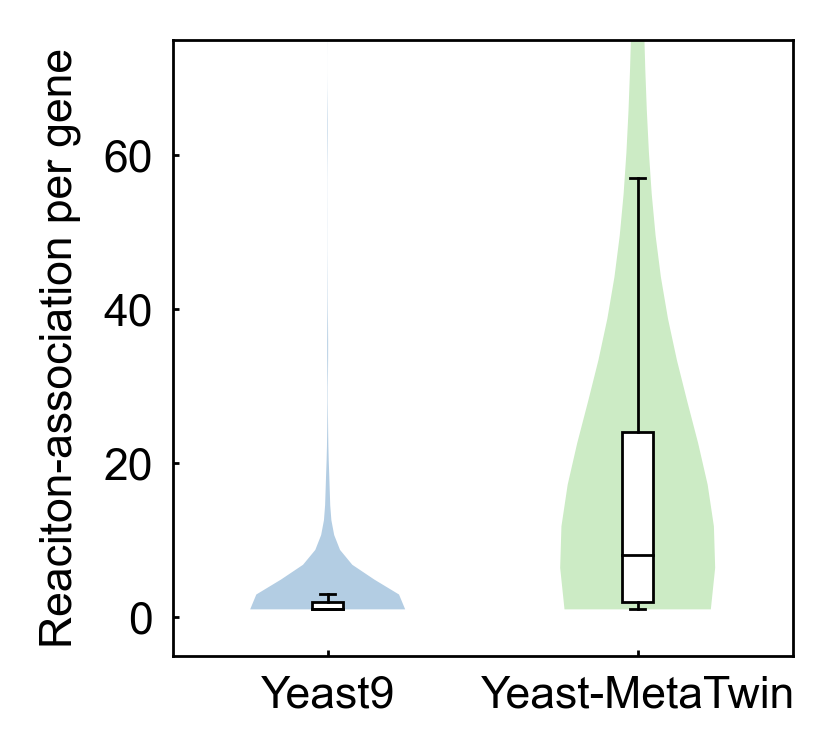

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 两组数据
all_ranks1 = yeast8_gene_reaction_frequency
all_ranks2 = yeastMT_gene_reaction_frequency
medians = [np.median(all_ranks1), np.median(all_ranks2)]
print('yeast9 medians',medians[0])
print('yeastMT medians',medians[1])

# 通用设置
plt.figure(figsize=(2, 2), dpi=400)
plt.rcParams.update({'font.size': 8, 'font.family': 'Arial', 'pdf.fonttype': 42})

positions = [1, 2]  # x轴位置
colors = ['#b3cde3', '#ccebc5']

for i, all_ranks in enumerate([all_ranks1, all_ranks2]):
    # 小提琴图
    violin_parts = plt.violinplot(all_ranks, positions=[positions[i]], vert=True,
                                  showmeans=False, showmedians=False, bw_method=0.3)
    for part in violin_parts['bodies']:
        part.set_zorder(1)
        part.set_alpha(1)
        part.set_color(colors[i])
        part.set_linewidth(0)
    for partname in ('cbars', 'cmins', 'cmaxes'):
        violin_parts[partname].set_alpha(0)

    # 叠加箱线图
    plt.boxplot(all_ranks, positions=[positions[i]], widths=0.1, patch_artist=True, showfliers=False,
                boxprops=dict(facecolor='white', color='black', linewidth=0.5),
                medianprops=dict(color='black', linewidth=0.5),
                whiskerprops=dict(color='black', linewidth=0.5),
                capprops=dict(color='black', linewidth=0.5))

# 坐标轴和标签
plt.ylabel("Reaciton-association per gene", fontsize=8)
plt.xticks(positions, [ 'Yeast9','Yeast-MetaTwin'], fontsize=8)
plt.xlim(0.5, 2.5)
plt.ylim(-5, 75)
plt.tick_params(axis='both', direction='in', width=0.5, which='both', length=1)

for spine in plt.gca().spines.values():
    spine.set_linewidth(0.5)
    
plt.savefig(figs3a_path, dpi=400, bbox_inches='tight')
plt.show()

## 反应的基因数目

In [6]:
reaction_list = [reaction.id for reaction in yeastMT.reactions]
len(reaction_list)

yeastMT_reaction_gene_frequency = []
for reaction in reaction_list:
    gpr_list = yeastMT.reactions.get_by_id(reaction).gene_reaction_rule.replace('(','').replace(')','').replace(' and ',' ').replace(' or ',' ').split(' ')
    yeastMT_reaction_gene_frequency.append(len(gpr_list))

reaction_list = [reaction.id for reaction in yeast8.reactions]
len(reaction_list)

yeast8_reaction_gene_frequency = []
for reaction in reaction_list:
    gpr_list = yeast8.reactions.get_by_id(reaction).gene_reaction_rule.replace('(','').replace(')','').replace(' and ',' ').replace(' or ',' ').split(' ')
    yeast8_reaction_gene_frequency.append(len(gpr_list))

In [7]:
# reaction_list = [reaction.id for reaction in model.reactions]
# len(reaction_list)

# reaction_gene_frequency = []
# for reaction in reaction_list:
#     # if model.reactions.get_by_id(reaction).gene_reaction_rule:
#     gpr_list = model.reactions.get_by_id(reaction).gene_reaction_rule.replace('(','').replace(')','').replace(' and ',' ').replace(' or ',' ').split(' ')
#     # else:
#         # pass
#     if len(gpr_list)>20:
#         print(reaction,len(gpr_list))
#     reaction_gene_frequency.append(len(gpr_list))

yeast9 medians 1.0
yeastMT medians 2.0


meta NOT subset; don't know how to subset; dropped


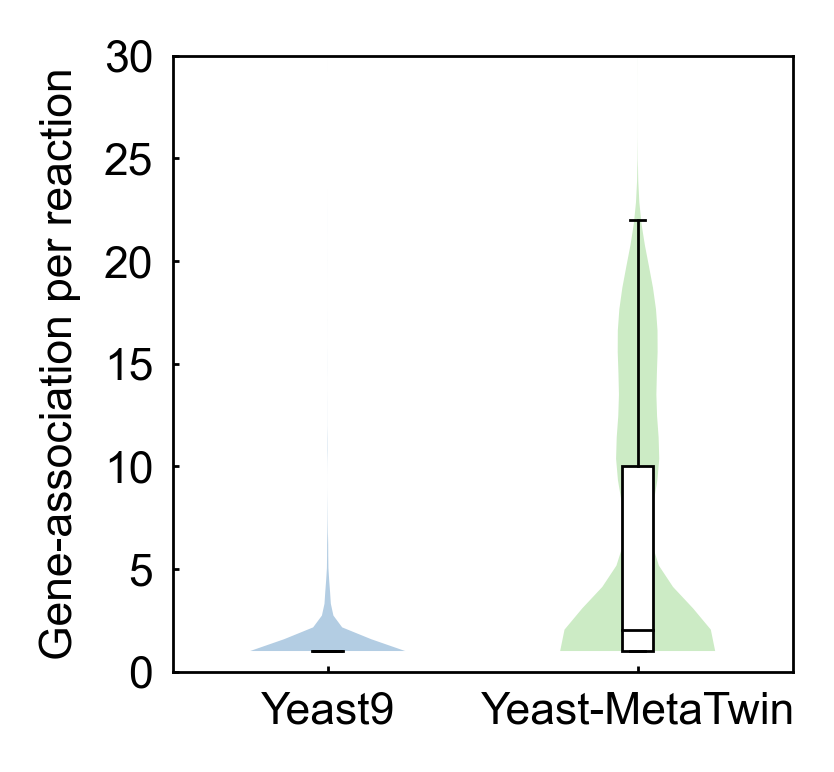

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 两组数据
all_ranks1 = yeast8_reaction_gene_frequency
all_ranks2 = yeastMT_reaction_gene_frequency
medians = [np.median(all_ranks1), np.median(all_ranks2)]
print('yeast9 medians',medians[0])
print('yeastMT medians',medians[1])

# 通用设置
plt.figure(figsize=(2, 2), dpi=400)
plt.rcParams.update({'font.size': 8, 'font.family': 'Arial', 'pdf.fonttype': 42})

positions = [1, 2]  # x轴位置
colors = ['#b3cde3', '#ccebc5']

for i, all_ranks in enumerate([all_ranks1, all_ranks2]):
    # 小提琴图
    violin_parts = plt.violinplot(all_ranks, positions=[positions[i]], vert=True,
                                  showmeans=False, showmedians=False, bw_method=0.3)
    for part in violin_parts['bodies']:
        part.set_zorder(1)
        part.set_alpha(1)
        part.set_color(colors[i])
        part.set_linewidth(0)
    for partname in ('cbars', 'cmins', 'cmaxes'):
        violin_parts[partname].set_alpha(0)

    # 叠加箱线图
    plt.boxplot(all_ranks, positions=[positions[i]], widths=0.1, patch_artist=True, showfliers=False,
                boxprops=dict(facecolor='white', color='black', linewidth=0.5),
                medianprops=dict(color='black', linewidth=0.5),
                whiskerprops=dict(color='black', linewidth=0.5),
                capprops=dict(color='black', linewidth=0.5))

# 坐标轴和标签
plt.ylabel("Gene-association per reaction", fontsize=8)
plt.xticks(positions, [ 'Yeast9','Yeast-MetaTwin'], fontsize=8)
plt.xlim(0.5, 2.5)
plt.ylim(0, 30)
plt.tick_params(axis='both', direction='in', width=0.5, which='both', length=1)

for spine in plt.gca().spines.values():
    spine.set_linewidth(0.5)
plt.savefig(figs3b_path, dpi=400, bbox_inches='tight')
plt.show()